<a href="https://colab.research.google.com/github/pranavrao87/Machine-Learning/blob/main/Classification%20Models/02_neural_network_classification_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to neural network classification w/ tensorflow

Learning how to write neural networks for classification problems
- Classification problem: when you to try to classify something as one thing or another
    - Binary classification
    - Multiclass classification
    - Multilabel classification


# Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Visualizing data

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1": X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


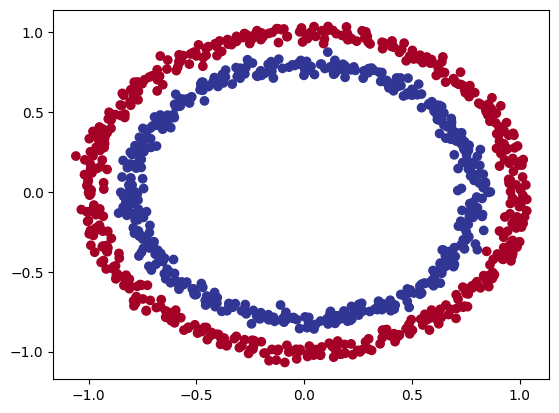

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Input and output shapes

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# number of samples
len(X), len(y)

(1000, 1000)

In [8]:
# View 1st example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

1. Create or import model
2. Compile model
3. Fit model
4. Evaluate model


In [9]:
import tensorflow as tf

In [10]:
# Set random seet
tf.random.set_seed(42)

# 1. Create model using Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 1.3737 - accuracy: 0.4470
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7044 - accuracy: 0.4690
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6975 - accuracy: 0.4790
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6949 - accuracy: 0.4980
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4830


In [11]:
# Train model for longer
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

50% accuracy on a binary classification model indicates that model is just guessing...

In [12]:
# Add extra layer
tf.random.set_seed(42)

# 1. Create model w/ 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Train model
model_2.fit(X, y, epochs=100, verbose=0)

In [13]:
# 4. Evaluate model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932448744773865, 0.5]

## Improving Model

1. Create model - add more layers or increase num of hidden units w/in layer
2. Compile model - choose diff optimization function (Adam instead of SGD)
3. Fit model - train for more epochs

In [59]:
# Set random seed
tf.random.set_seed(42)

# 1. Create model w/ 3 layers
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10), # add layers w/ 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit model
model_3.fit(X, y, epochs=100, verbose=0)

In [60]:
# 4. Evaluate model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6999 - accuracy: 0.5100


[0.6998923420906067, 0.5099999904632568]

Create function to visualize function predictions: 'plot_decision_boundary()'
- Take in trained model, features (X) labels (y)
- Create a meshgrid of diff X vals
- Make predictions across meshgrid
- Plot predictions as well as trends line b/w zones where each unique class falls

In [61]:
import numpy as np


In [62]:
def plot_decision_boundary(model, X, y):
  """
  Plots decision boundary created by model predicting on X.
      1. CS231n - https://cs231n.github.io/neural-networks-case-study/
      2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define axis boundaries of plot and create meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (going to predict on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1:
    print("Multiclass classification")
    # Reshape predictions to get ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot decisions
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
Binary classification


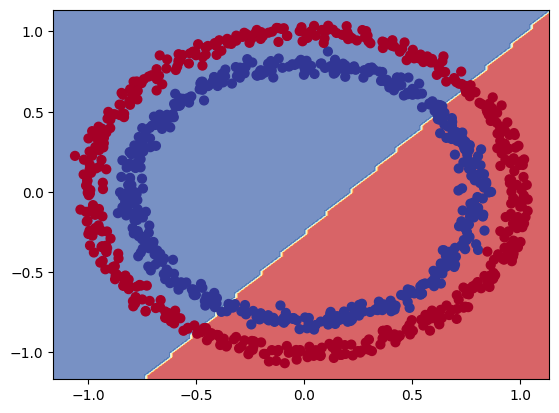

In [63]:
# Check predictions model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [64]:
# Try model on regression data

tf.random.set_seed(42)

# Regression data
X_reg = tf.range(0, 1000, 5)
y_reg = tf.range(100, 1100, 5) # y = X + 100
X_reg, y_reg

# Split data into training and test sets
X_reg_train = X_reg[:150]
X_reg_test = X_reg[150:]
y_reg_train = y_reg[:150]
y_reg_test = y_reg[150:]

# Fit model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100


ValueError: ignored

model_3 developed for binary classification problem which uses loss=BinaryCrossentropy, but regression problem requires a loss function usually of mae or mse

In [65]:
# rand seed
tf.random.set_seed(42)

# 1. Create model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile model w/ regression specific loss function
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 409.0318 - mae: 409.0318
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 294.0318 - mae: 294.0318
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 184.2008 - mae: 184.2008
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 72.1516 - mae: 72.1516
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 66.8663 - mae: 66.8663
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 86.7407 - mae: 86.7407
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 61.8353 - mae: 61.8353
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 43.8555 - mae: 43.8555
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 47.8238 - mae: 47.8238
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 41.8975 - mae: 41.8975
Epoch 11/100
5/5 [==============================] - 0

2/2 [==============================] - 0s 6ms/step


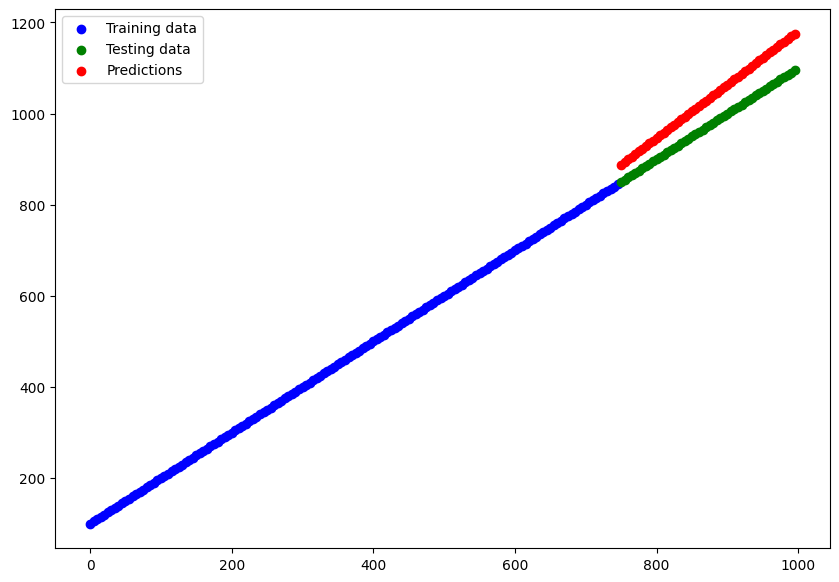

In [66]:
# Make predictions w/ trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot model's predictions against data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Testing data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

## Non-linearity

In [67]:
# Rebuild this model: https://playground.tensorflow.org/#activation=linear&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=1&seed=0.26333&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false
# Rand seed
tf.random.set_seed(42)

# 1. Create model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="linear")
])

# 2. Compile model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.3174 - accuracy: 0.4270
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2346 - accuracy: 0.4210
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1325 - accuracy: 0.4090
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0405 - accuracy: 0.4120
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0168 - accuracy: 0.4250
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9435 - accuracy: 0.4360
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8613 - accuracy: 0.4420
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7500 - accuracy: 0.4510
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6076 - accuracy: 0.4500
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.4701 - accuracy: 0.4570
Epoch 11/

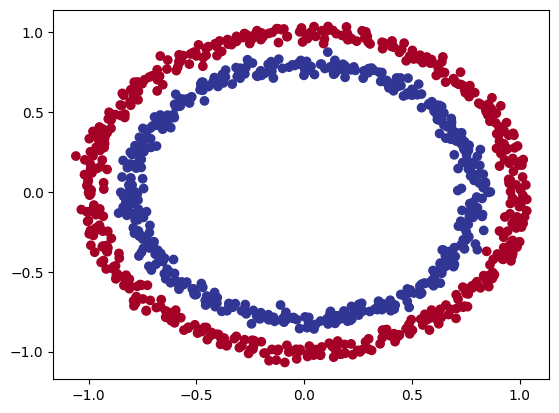

In [68]:
# Visualize data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
Binary classification


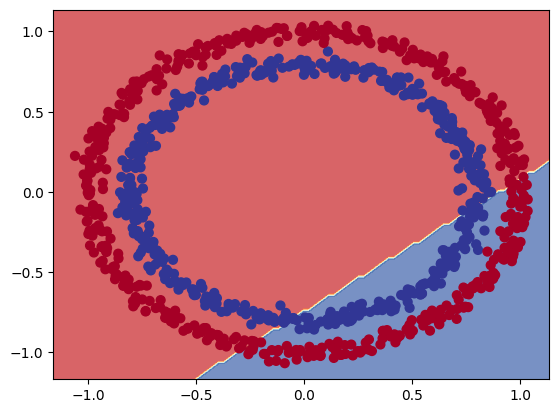

In [69]:
# Decision boundary for latest model
plot_decision_boundary(model_4, X, y)